# Artificial Neural Network Heuristic: performance analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn-paper')

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# set matplotlib font to Times
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

## Data preprocessing

In [3]:
results = pd.read_csv("~/code/fifteen-puzzle/data/experiments/v3/all-heuristics-benchmark-v3-with-amse08.csv")
results.shape

(10548, 9)

In [4]:
results.head(10)

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION
0,2019-12-14 14:41:40.580442 PID6073,1,IDA*,PDB[Pat:8],RND,3.868803,60,23313,52.000000
1,2019-12-14 14:41:40.580442 PID6073,1,A*,PDB[Pat:8],RND,5.156111,60,24922,52.000000
2,2019-12-14 14:41:40.580442 PID6073,1,A*,PDB[Pat:8;W:1.15],RND,0.795961,62,4187,59.800000
3,2019-12-14 14:41:40.580442 PID6073,1,A*,PDB[Pat:8;W:1.3],RND,0.631679,66,2838,67.600000
4,2019-12-14 14:41:40.580442 PID6073,1,A*,PDB[Pat:8;W:1.45],RND,0.127586,66,739,75.400000
5,2019-12-14 14:41:40.580442 PID6073,1,A*,ANN[Label:MSE],RND,8.194638,62,602,60.429142
6,2019-12-14 14:41:40.580442 PID6073,1,A*,ANN[Label:MSE1layer],RND,8.034134,62,918,60.842106
7,2019-12-14 14:41:40.580442 PID6073,1,A*,ANN[Label:AMSE0.4],RND,7.659301,62,522,59.767769
8,2019-12-14 14:41:40.580442 PID6073,1,A*,ANN[Label:AMSE0.8],RND,50.593724,62,3493,55.750999
9,2019-12-14 14:41:40.580442 PID6073,2,IDA*,PDB[Pat:8],RND,0.953426,48,5949,44.000000


In [5]:
results["HEURISTIC_NAME"].unique()

array(['PDB[Pat:8]', 'PDB[Pat:8;W:1.15]', 'PDB[Pat:8;W:1.3]',
       'PDB[Pat:8;W:1.45]', 'ANN[Label:MSE]', 'ANN[Label:MSE1layer]',
       'ANN[Label:AMSE0.4]', 'ANN[Label:AMSE0.8]'], dtype=object)

In [6]:
optimal_results = results[results["ALGORITHM_NAME"] == "IDA*"]

In [7]:
def optimal_cost(row):
    board_id = row["BOARD_ID"]
    pdb_row_df = optimal_results[optimal_results.BOARD_ID == board_id]
    return pdb_row_df.iloc[0]["SOLUTION_COST"]

In [8]:
results_complete = results.copy()

results_complete["OPTIMAL_SOLUTION_COST"] = results_complete.apply(lambda row: optimal_cost(row), axis=1)
results_complete["SOLUTION_COST_ERROR"] = results_complete["SOLUTION_COST"] - results_complete["OPTIMAL_SOLUTION_COST"]
results_complete["INITIAL_HEURISTIC_PREDICTION_ERROR"] = results_complete["INITIAL_HEURISTIC_PREDICTION"] - results_complete["OPTIMAL_SOLUTION_COST"]

In [9]:
results_complete.head(25)

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
0,2019-12-14 14:41:40.580442 PID6073,1,IDA*,PDB[Pat:8],RND,3.868803,60,23313,52.000000,60,0,-8.000000
1,2019-12-14 14:41:40.580442 PID6073,1,A*,PDB[Pat:8],RND,5.156111,60,24922,52.000000,60,0,-8.000000
2,2019-12-14 14:41:40.580442 PID6073,1,A*,PDB[Pat:8;W:1.15],RND,0.795961,62,4187,59.800000,60,2,-0.200000
3,2019-12-14 14:41:40.580442 PID6073,1,A*,PDB[Pat:8;W:1.3],RND,0.631679,66,2838,67.600000,60,6,7.600000
4,2019-12-14 14:41:40.580442 PID6073,1,A*,PDB[Pat:8;W:1.45],RND,0.127586,66,739,75.400000,60,6,15.400000
5,2019-12-14 14:41:40.580442 PID6073,1,A*,ANN[Label:MSE],RND,8.194638,62,602,60.429142,60,2,0.429142
6,2019-12-14 14:41:40.580442 PID6073,1,A*,ANN[Label:MSE1layer],RND,8.034134,62,918,60.842106,60,2,0.842106
7,2019-12-14 14:41:40.580442 PID6073,1,A*,ANN[Label:AMSE0.4],RND,7.659301,62,522,59.767769,60,2,-0.232231
8,2019-12-14 14:41:40.580442 PID6073,1,A*,ANN[Label:AMSE0.8],RND,50.593724,62,3493,55.750999,60,2,-4.249001
9,2019-12-14 14:41:40.580442 PID6073,2,IDA*,PDB[Pat:8],RND,0.953426,48,5949,44.000000,48,0,-4.000000


In [10]:
pdb_results_complete = results_complete[
    (results_complete["HEURISTIC_NAME"] == "PDB[Pat:8]") & (results_complete["ALGORITHM_NAME"] == "A*")]
pdb115_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "PDB[Pat:8;W:1.15]"]
pdb13_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "PDB[Pat:8;W:1.3]"]
pdb145_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "PDB[Pat:8;W:1.45]"]
ann_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "ANN[Label:MSE]"]
ann1l_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "ANN[Label:MSE1layer]"]
ann04_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "ANN[Label:AMSE0.4]"]
ann08_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "ANN[Label:AMSE0.8]"]

In [11]:
pdb_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
1,2019-12-14 14:41:40.580442 PID6073,1,A*,PDB[Pat:8],RND,5.156111,60,24922,52.0,60,0,-8.0
10,2019-12-14 14:41:40.580442 PID6073,2,A*,PDB[Pat:8],RND,0.942760,48,4131,44.0,48,0,-4.0
19,2019-12-14 14:41:40.580442 PID6073,3,A*,PDB[Pat:8],RND,16.143479,53,73907,41.0,53,0,-12.0
28,2019-12-14 14:41:40.580442 PID6073,4,A*,PDB[Pat:8],RND,1.440718,53,7220,45.0,53,0,-8.0
37,2019-12-14 14:41:40.580442 PID6073,5,A*,PDB[Pat:8],RND,19.918594,58,92222,48.0,58,0,-10.0


In [12]:
pdb115_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
2,2019-12-14 14:41:40.580442 PID6073,1,A*,PDB[Pat:8;W:1.15],RND,0.795961,62,4187,59.80,60,2,-0.20
11,2019-12-14 14:41:40.580442 PID6073,2,A*,PDB[Pat:8;W:1.15],RND,0.124209,50,585,50.60,48,2,2.60
20,2019-12-14 14:41:40.580442 PID6073,3,A*,PDB[Pat:8;W:1.15],RND,0.680722,53,3505,47.15,53,0,-5.85
29,2019-12-14 14:41:40.580442 PID6073,4,A*,PDB[Pat:8;W:1.15],RND,0.043975,53,261,51.75,53,0,-1.25
38,2019-12-14 14:41:40.580442 PID6073,5,A*,PDB[Pat:8;W:1.15],RND,4.754353,60,22506,55.20,58,2,-2.80


In [13]:
pdb13_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
3,2019-12-14 14:41:40.580442 PID6073,1,A*,PDB[Pat:8;W:1.3],RND,0.631679,66,2838,67.6,60,6,7.6
12,2019-12-14 14:41:40.580442 PID6073,2,A*,PDB[Pat:8;W:1.3],RND,0.022604,52,111,57.2,48,4,9.2
21,2019-12-14 14:41:40.580442 PID6073,3,A*,PDB[Pat:8;W:1.3],RND,0.177443,55,867,53.3,53,2,0.3
30,2019-12-14 14:41:40.580442 PID6073,4,A*,PDB[Pat:8;W:1.3],RND,0.038116,53,222,58.5,53,0,5.5
39,2019-12-14 14:41:40.580442 PID6073,5,A*,PDB[Pat:8;W:1.3],RND,0.704358,62,3411,62.4,58,4,4.4


In [14]:
pdb145_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
4,2019-12-14 14:41:40.580442 PID6073,1,A*,PDB[Pat:8;W:1.45],RND,0.127586,66,739,75.40,60,6,15.40
13,2019-12-14 14:41:40.580442 PID6073,2,A*,PDB[Pat:8;W:1.45],RND,0.023475,52,113,63.80,48,4,15.80
22,2019-12-14 14:41:40.580442 PID6073,3,A*,PDB[Pat:8;W:1.45],RND,0.120870,59,677,59.45,53,6,6.45
31,2019-12-14 14:41:40.580442 PID6073,4,A*,PDB[Pat:8;W:1.45],RND,0.030623,53,171,65.25,53,0,12.25
40,2019-12-14 14:41:40.580442 PID6073,5,A*,PDB[Pat:8;W:1.45],RND,0.293050,64,1284,69.60,58,6,11.60


In [15]:
ann_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
5,2019-12-14 14:41:40.580442 PID6073,1,A*,ANN[Label:MSE],RND,8.194638,62,602,60.429142,60,2,0.429142
14,2019-12-14 14:41:40.580442 PID6073,2,A*,ANN[Label:MSE],RND,1.914996,50,131,48.829140,48,2,0.829140
23,2019-12-14 14:41:40.580442 PID6073,3,A*,ANN[Label:MSE],RND,3.506771,53,254,50.244507,53,0,-2.755493
32,2019-12-14 14:41:40.580442 PID6073,4,A*,ANN[Label:MSE],RND,4.717155,55,348,54.379250,53,2,1.379250
41,2019-12-14 14:41:40.580442 PID6073,5,A*,ANN[Label:MSE],RND,16.825933,62,1147,58.389114,58,4,0.389114


In [16]:
ann1l_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
6,2019-12-14 14:41:40.580442 PID6073,1,A*,ANN[Label:MSE1layer],RND,8.034134,62,918,60.842106,60,2,0.842106
15,2019-12-14 14:41:40.580442 PID6073,2,A*,ANN[Label:MSE1layer],RND,6.884246,48,736,49.260033,48,0,1.260033
24,2019-12-14 14:41:40.580442 PID6073,3,A*,ANN[Label:MSE1layer],RND,20.960621,53,2310,50.638023,53,0,-2.361977
33,2019-12-14 14:41:40.580442 PID6073,4,A*,ANN[Label:MSE1layer],RND,5.013251,55,567,53.305206,53,2,0.305206
42,2019-12-14 14:41:40.580442 PID6073,5,A*,ANN[Label:MSE1layer],RND,20.462303,60,2188,58.079842,58,2,0.079842


In [17]:
ann04_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
7,2019-12-14 14:41:40.580442 PID6073,1,A*,ANN[Label:AMSE0.4],RND,7.659301,62,522,59.767769,60,2,-0.232231
16,2019-12-14 14:41:40.580442 PID6073,2,A*,ANN[Label:AMSE0.4],RND,2.873658,50,198,48.312920,48,2,0.312920
25,2019-12-14 14:41:40.580442 PID6073,3,A*,ANN[Label:AMSE0.4],RND,4.702603,53,327,48.645164,53,0,-4.354836
34,2019-12-14 14:41:40.580442 PID6073,4,A*,ANN[Label:AMSE0.4],RND,3.399275,55,252,52.632996,53,2,-0.367004
43,2019-12-14 14:41:40.580442 PID6073,5,A*,ANN[Label:AMSE0.4],RND,21.726130,60,1498,56.303246,58,2,-1.696754


In [18]:
ann08_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
8,2019-12-14 14:41:40.580442 PID6073,1,A*,ANN[Label:AMSE0.8],RND,50.593724,62,3493,55.750999,60,2,-4.249001
17,2019-12-14 14:41:40.580442 PID6073,2,A*,ANN[Label:AMSE0.8],RND,29.595383,50,2025,45.505802,48,2,-2.494198
26,2019-12-14 14:41:40.580442 PID6073,3,A*,ANN[Label:AMSE0.8],RND,96.675236,53,7343,46.332718,53,0,-6.667282
35,2019-12-14 14:41:40.580442 PID6073,4,A*,ANN[Label:AMSE0.8],RND,7.516978,53,537,49.943020,53,0,-3.056980
44,2019-12-14 14:41:40.580442 PID6073,5,A*,ANN[Label:AMSE0.8],RND,107.211270,60,7631,53.551224,58,2,-4.448776


## Analysis of results of A* searches

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text yticklabel objects>)

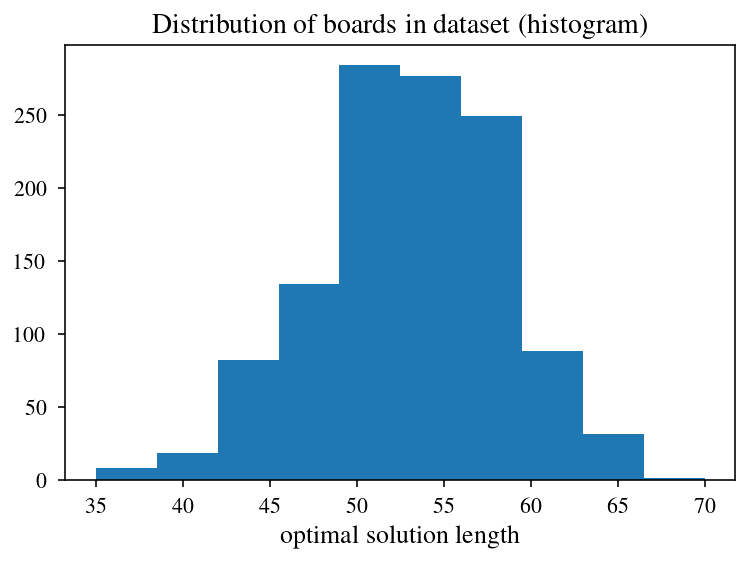

In [19]:
f = plt.figure()

plt.hist(pdb_results_complete["SOLUTION_COST"], bins=10);
plt.title("Distribution of boards in dataset (histogram)", fontsize=14)
plt.xlabel("optimal solution length", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# f.savefig("expr_boards-optimal-sol-len-distr.pdf", bbox_inches='tight')

In [20]:
pdb_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,1172.000000,1172.000000,1172.000000,1.172000e+03,1172.000000,1172.000000,1172.0,1172.000000
mean,586.500000,6.945509,52.840444,6.222206e+04,45.760239,52.840444,0.0,-7.080205
std,338.471565,22.585534,5.317837,2.053941e+05,4.792147,5.317837,0.0,2.469361
min,1.000000,0.004757,35.000000,5.000000e+01,26.000000,35.000000,0.0,-16.000000
25%,293.750000,0.576685,49.000000,5.480000e+03,43.000000,49.000000,0.0,-8.000000
50%,586.500000,1.844098,53.000000,1.728500e+04,46.000000,53.000000,0.0,-8.000000
75%,879.250000,5.810574,57.000000,5.196000e+04,49.000000,57.000000,0.0,-6.000000
max,1172.000000,614.609248,70.000000,5.643983e+06,62.000000,70.000000,0.0,0.000000


In [21]:
pdb115_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,586.500000,0.346293,53.466724,3295.779863,52.624275,52.840444,0.626280,-0.216169
std,338.471565,0.696005,5.528723,6365.030192,5.510969,5.317837,1.029169,2.594592
min,1.000000,0.004202,35.000000,44.000000,29.900000,35.000000,0.000000,-10.000000
25%,293.750000,0.052873,50.000000,531.750000,49.450000,49.000000,0.000000,-2.000000
50%,586.500000,0.148546,54.000000,1489.000000,52.900000,53.000000,0.000000,-0.150000
75%,879.250000,0.379912,57.000000,3570.250000,56.350000,57.000000,2.000000,1.500000
max,1172.000000,12.326621,72.000000,104297.000000,71.300000,70.000000,4.000000,7.200000


In [22]:
pdb13_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,586.500000,0.106766,55.195392,1016.662116,59.488311,52.840444,2.354949,6.647867
std,338.471565,0.205942,6.024449,1830.657110,6.229791,5.317837,1.949915,2.898185
min,1.000000,0.004143,35.000000,42.000000,33.800000,35.000000,0.000000,-4.000000
25%,293.750000,0.022903,51.000000,233.750000,55.900000,49.000000,0.000000,4.600000
50%,586.500000,0.051339,55.000000,519.000000,59.800000,53.000000,2.000000,6.700000
75%,879.250000,0.118339,59.250000,1151.500000,63.700000,57.000000,4.000000,8.700000
max,1172.000000,4.433555,74.000000,35212.000000,80.600000,70.000000,10.000000,14.800000


In [23]:
pdb145_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,586.500000,0.055630,57.521331,540.169795,66.352346,52.840444,4.680887,13.511903
std,338.471565,0.073859,6.778329,683.586440,6.948613,5.317837,2.919450,3.331734
min,1.000000,0.004235,36.000000,42.000000,37.700000,35.000000,0.000000,1.700000
25%,293.750000,0.016310,53.000000,167.000000,62.350000,49.000000,2.000000,11.150000
50%,586.500000,0.031554,58.000000,315.000000,66.700000,53.000000,4.000000,13.600000
75%,879.250000,0.063056,62.000000,630.250000,71.050000,57.000000,6.000000,15.800000
max,1172.000000,0.905141,78.000000,8396.000000,89.900000,70.000000,14.000000,23.200000


In [24]:
ann_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,586.500000,2.405262,53.693686,354.905290,52.899884,52.840444,0.853242,0.059441
std,338.471565,2.676752,5.514753,357.034154,5.063508,5.317837,1.140347,1.422258
min,1.000000,0.235315,35.000000,40.000000,35.737930,35.000000,0.000000,-3.954800
25%,293.750000,0.854846,50.000000,130.750000,49.558340,49.000000,0.000000,-0.893727
50%,586.500000,1.599495,54.000000,241.500000,52.967320,53.000000,0.000000,-0.050961
75%,879.250000,2.952010,58.000000,435.250000,56.446391,57.000000,2.000000,0.981194
max,1172.000000,38.313979,72.000000,3555.000000,69.351181,70.000000,6.000000,5.237522


In [25]:
ann1l_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,586.500000,5.987707,53.731229,1576.661263,52.697445,52.840444,0.890785,-0.142999
std,338.471565,16.324231,5.554968,4527.968746,5.087344,5.317837,1.159383,1.485065
min,1.000000,0.215367,35.000000,63.000000,34.567188,35.000000,0.000000,-4.695457
25%,293.750000,1.073980,50.000000,282.000000,49.375847,49.000000,0.000000,-1.203616
50%,586.500000,2.507971,54.000000,662.500000,52.873568,53.000000,0.000000,-0.230740
75%,879.250000,5.703642,58.000000,1473.000000,56.245351,57.000000,2.000000,0.810189
max,1172.000000,451.749396,74.000000,126694.000000,70.069427,70.000000,6.000000,5.311050


In [26]:
ann04_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,586.500000,3.542607,53.548635,531.756826,51.457036,52.840444,0.708191,-1.383408
std,338.471565,4.275173,5.478023,634.693297,4.872674,5.317837,1.055344,1.461562
min,1.000000,0.248446,35.000000,39.000000,33.839977,35.000000,0.000000,-5.660484
25%,293.750000,1.064804,50.000000,165.000000,48.392135,49.000000,0.000000,-2.420446
50%,586.500000,2.184922,54.000000,335.500000,51.612451,53.000000,0.000000,-1.538371
75%,879.250000,4.219387,57.000000,647.500000,54.742708,57.000000,2.000000,-0.437008
max,1172.000000,54.116392,72.000000,8874.000000,68.296341,70.000000,4.000000,4.369038


In [27]:
ann08_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,586.500000,16.812324,53.490614,2575.516212,48.933175,52.840444,0.650171,-3.907268
std,338.471565,28.871838,5.443828,4266.488916,4.615847,5.317837,1.020946,1.670920
min,1.000000,0.331198,35.000000,55.000000,30.382540,35.000000,0.000000,-9.275597
25%,293.750000,3.353176,50.000000,516.000000,46.168733,49.000000,0.000000,-5.138686
50%,586.500000,8.005183,54.000000,1264.000000,49.218153,53.000000,0.000000,-3.969003
75%,879.250000,17.675467,57.000000,2810.500000,52.126976,57.000000,2.000000,-2.834409
max,1172.000000,374.710430,72.000000,63697.000000,62.895088,70.000000,6.000000,1.788773


# Optimality of results

In [38]:
solution_length_errors_distribution = pd.DataFrame(pdb_results_complete['SOLUTION_COST_ERROR'].value_counts()).reset_index()
solution_length_errors_distribution.columns = ['SOLUTION COST ERROR', 'BOARDS COUNT']

solution_length_errors_distribution

,SOLUTION COST ERROR,BOARDS COUNT
0,0,1172


In [28]:
solution_length_errors_distribution = pd.DataFrame(pdb115_results_complete['SOLUTION_COST_ERROR'].value_counts()).reset_index()
solution_length_errors_distribution.columns = ['SOLUTION COST ERROR', 'BOARDS COUNT']

solution_length_errors_distribution

,SOLUTION COST ERROR,BOARDS COUNT
0,0,834
1,2,309
2,4,29


In [39]:
834 / 1172

0.71160409556314

In [29]:
solution_length_errors_distribution = pd.DataFrame(pdb13_results_complete['SOLUTION_COST_ERROR'].value_counts()).reset_index()
solution_length_errors_distribution.columns = ['SOLUTION COST ERROR', 'BOARDS COUNT']

solution_length_errors_distribution

,SOLUTION COST ERROR,BOARDS COUNT
0,2,448
1,0,323
2,4,288
3,6,97
4,8,15
5,10,1


In [40]:
448 / 1172

0.3822525597269625

In [30]:
solution_length_errors_distribution = pd.DataFrame(pdb145_results_complete['SOLUTION_COST_ERROR'].value_counts()).reset_index()
solution_length_errors_distribution.columns = ['SOLUTION COST ERROR', 'BOARDS COUNT']

solution_length_errors_distribution

,SOLUTION COST ERROR,BOARDS COUNT
0,4,289
1,6,271
2,2,224
3,8,167
4,0,133
5,10,70
6,12,16
7,14,2


In [41]:
289 / 1172

0.24658703071672355

In [31]:
solution_length_errors_distribution = pd.DataFrame(ann_results_complete['SOLUTION_COST_ERROR'].value_counts()).reset_index()
solution_length_errors_distribution.columns = ['SOLUTION COST ERROR', 'BOARDS COUNT']

solution_length_errors_distribution

,SOLUTION COST ERROR,BOARDS COUNT
0,0,718
1,2,409
2,4,44
3,6,1


In [42]:
718 / 1172

0.6126279863481229

In [33]:
solution_length_errors_distribution = pd.DataFrame(ann1l_results_complete['SOLUTION_COST_ERROR'].value_counts()).reset_index()
solution_length_errors_distribution.columns = ['SOLUTION COST ERROR', 'BOARDS COUNT']

solution_length_errors_distribution

,SOLUTION COST ERROR,BOARDS COUNT
0,0,701
1,2,421
2,4,49
3,6,1


In [45]:
701 / 1172

0.5981228668941979

In [34]:
solution_length_errors_distribution = pd.DataFrame(ann04_results_complete['SOLUTION_COST_ERROR'].value_counts()).reset_index()
solution_length_errors_distribution.columns = ['SOLUTION COST ERROR', 'BOARDS COUNT']

solution_length_errors_distribution

,SOLUTION COST ERROR,BOARDS COUNT
0,0,786
1,2,357
2,4,29


In [43]:
786 / 1172

0.6706484641638225

In [36]:
solution_length_errors_distribution = pd.DataFrame(ann08_results_complete['SOLUTION_COST_ERROR'].value_counts()).reset_index()
solution_length_errors_distribution.columns = ['SOLUTION COST ERROR', 'BOARDS COUNT']

solution_length_errors_distribution

,SOLUTION COST ERROR,BOARDS COUNT
0,0,814
1,2,336
2,4,21
3,6,1


In [44]:
814 / 1172

0.6945392491467577

# Figures

## Distribution of optimal solution costs

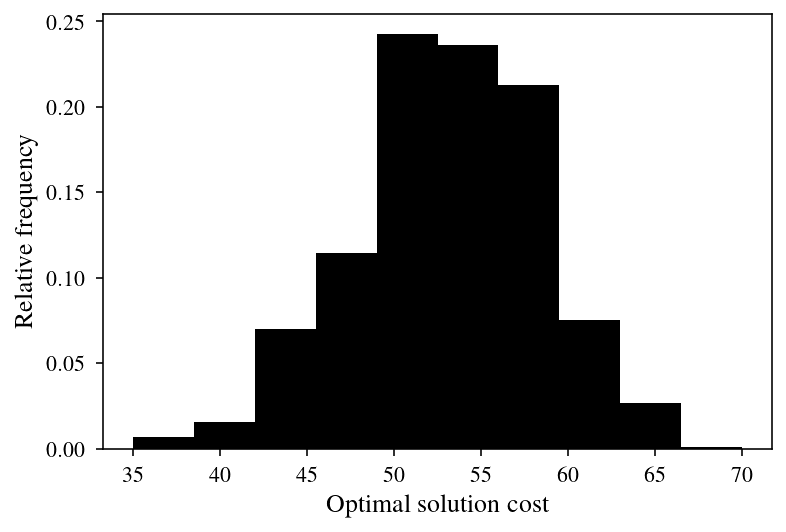

In [87]:
f = plt.figure()

values = ann_results_complete.OPTIMAL_SOLUTION_COST
weights = np.ones_like(values) / float(len(values))
plt.hist(values, bins=10, weights=weights, color='k')
plt.xlabel('Optimal solution cost', fontsize=13)
plt.ylabel('Relative frequency', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

f.savefig("benchmark-dataset-histogram.pdf", bbox_inches='tight')

## Distribution of number of expanded nodes

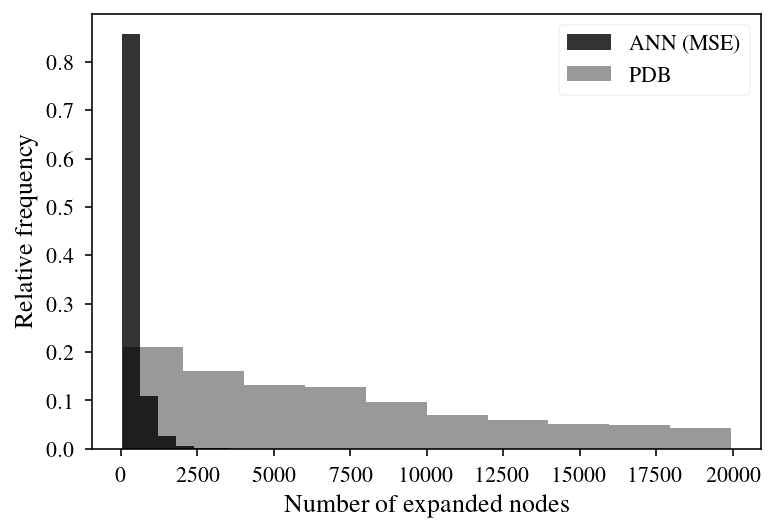

In [94]:
f = plt.figure()

values = ann_results_complete.EXPANDED_NODES
weights = np.ones_like(values) / float(len(values))
plt.hist(values, bins=6, weights=weights, color='k', alpha=0.8, label="ANN (MSE)")

values = pdb_results_complete.EXPANDED_NODES[pdb_results_complete.EXPANDED_NODES < 20000]
weights = np.ones_like(values) / float(len(values))
plt.hist(values, bins=10, weights=weights, color='k', alpha=0.4, label="PDB")

plt.xlabel('Number of expanded nodes', fontsize=13)
plt.ylabel('Relative frequency', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# plt.xlim(0, 1000000)

plt.legend(fontsize=11)

f.savefig("benchmark-expanded-nodes-histogram.pdf", bbox_inches='tight')

## Distribution of prediction error

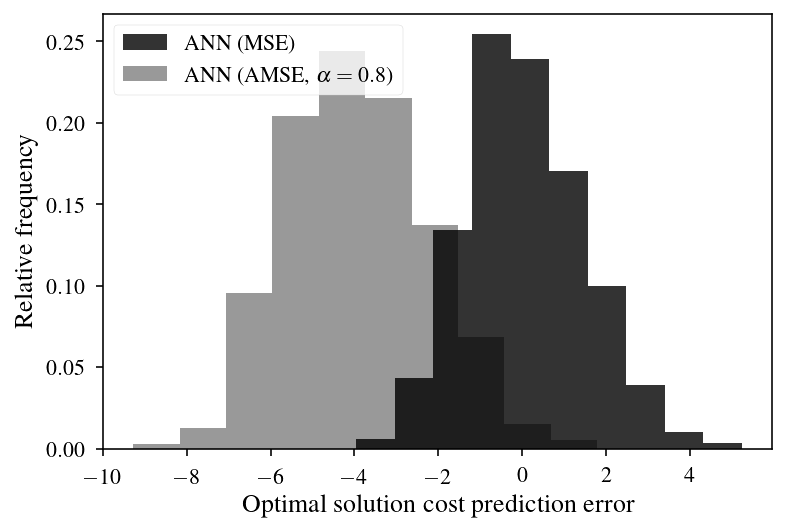

In [100]:
f = plt.figure()

values = ann_results_complete.INITIAL_HEURISTIC_PREDICTION_ERROR
weights = np.ones_like(values) / float(len(values))
plt.hist(values, bins=10, weights=weights, color='k', alpha=0.8, label="ANN (MSE)")

values = ann08_results_complete.INITIAL_HEURISTIC_PREDICTION_ERROR
weights = np.ones_like(values) / float(len(values))
plt.hist(values, bins=10, weights=weights, color='k', alpha=0.4, label=r"ANN (AMSE, $\alpha=0.8$)")

plt.xlabel('Optimal solution cost prediction error', fontsize=13)
plt.ylabel('Relative frequency', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# plt.xlim(0, 1000000)

plt.legend(fontsize=11)

f.savefig("ann-prediction-error-histogram.pdf", bbox_inches='tight')

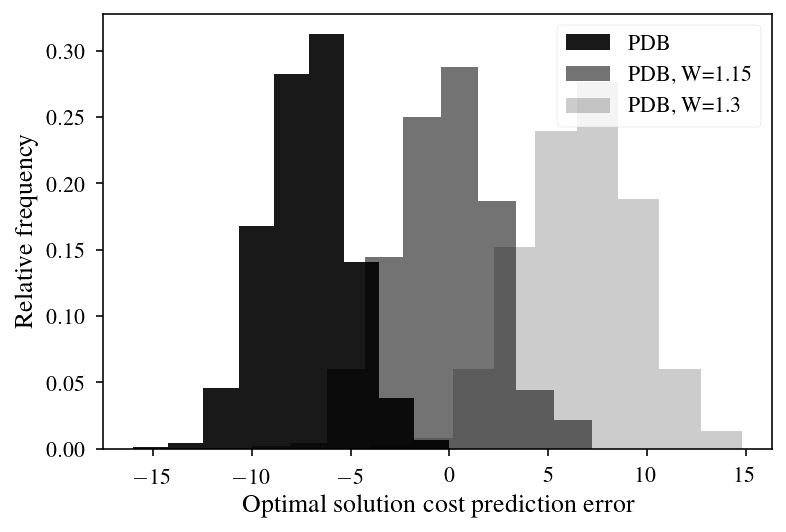

In [102]:
f = plt.figure()

values = pdb_results_complete.INITIAL_HEURISTIC_PREDICTION_ERROR
weights = np.ones_like(values) / float(len(values))
plt.hist(values, bins=9, weights=weights, color='k', alpha=0.9, label=r"PDB")

values = pdb115_results_complete.INITIAL_HEURISTIC_PREDICTION_ERROR
weights = np.ones_like(values) / float(len(values))
plt.hist(values, bins=9, weights=weights, color='k', alpha=0.55, label=r"PDB, W=1.15")

values = pdb13_results_complete.INITIAL_HEURISTIC_PREDICTION_ERROR
weights = np.ones_like(values) / float(len(values))
plt.hist(values, bins=9, weights=weights, color='k', alpha=0.2, label=r"PDB, W=1.3")

plt.xlabel('Optimal solution cost prediction error', fontsize=13)
plt.ylabel('Relative frequency', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# plt.xlim(0, 1000000)

plt.legend(fontsize=11)

f.savefig("pdb-prediction-error-histogram.pdf", bbox_inches='tight')

## Distribution of heuristic predictions

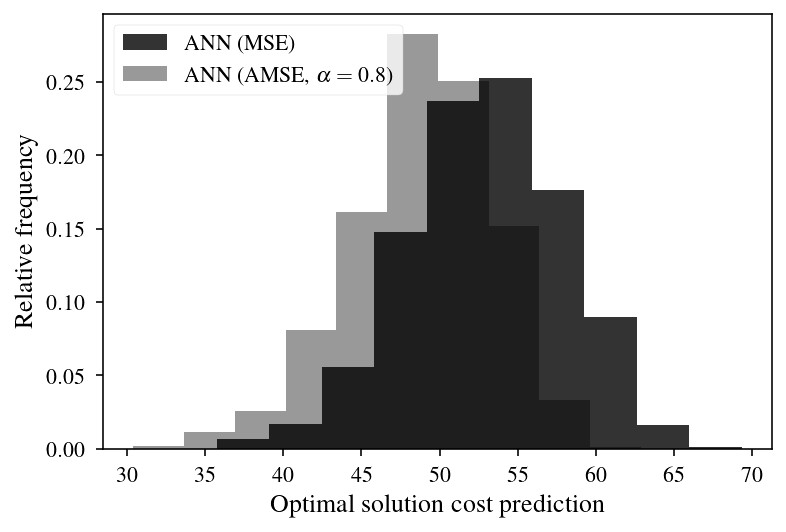

In [14]:
f = plt.figure()

values = ann_results_complete.INITIAL_HEURISTIC_PREDICTION
weights = np.ones_like(values) / float(len(values))
plt.hist(values, bins=10, weights=weights, color='k', alpha=0.8, label="ANN (MSE)")

values = ann08_results_complete.INITIAL_HEURISTIC_PREDICTION
weights = np.ones_like(values) / float(len(values))
plt.hist(values, bins=10, weights=weights, color='k', alpha=0.4, label=r"ANN (AMSE, $\alpha=0.8$)")

plt.xlabel('Optimal solution cost prediction', fontsize=13)
plt.ylabel('Relative frequency', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(fontsize=11)

f.savefig("ann-prediction-histogram.pdf", bbox_inches='tight')

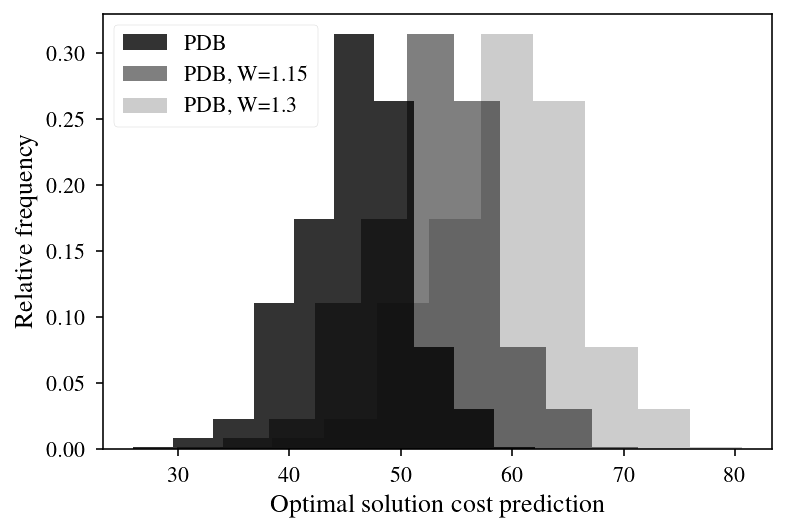

In [23]:
f = plt.figure()

values = pdb_results_complete.INITIAL_HEURISTIC_PREDICTION
weights = np.ones_like(values) / float(len(values))
plt.hist(values, bins=10, weights=weights, color='k', alpha=0.8, label=r"PDB")

values = pdb115_results_complete.INITIAL_HEURISTIC_PREDICTION
weights = np.ones_like(values) / float(len(values))
plt.hist(values, bins=10, weights=weights, color='k', alpha=0.5, label=r"PDB, W=1.15")

values = pdb13_results_complete.INITIAL_HEURISTIC_PREDICTION
weights = np.ones_like(values) / float(len(values))
plt.hist(values, bins=10, weights=weights, color='k', alpha=0.2, label=r"PDB, W=1.3")

plt.xlabel('Optimal solution cost prediction', fontsize=13)
plt.ylabel('Relative frequency', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(fontsize=11)

f.savefig("pdb-prediction-histogram.pdf", bbox_inches='tight')

# Legacy section

/home/batman/.miniconda3/envs/fifteen-puzzle/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


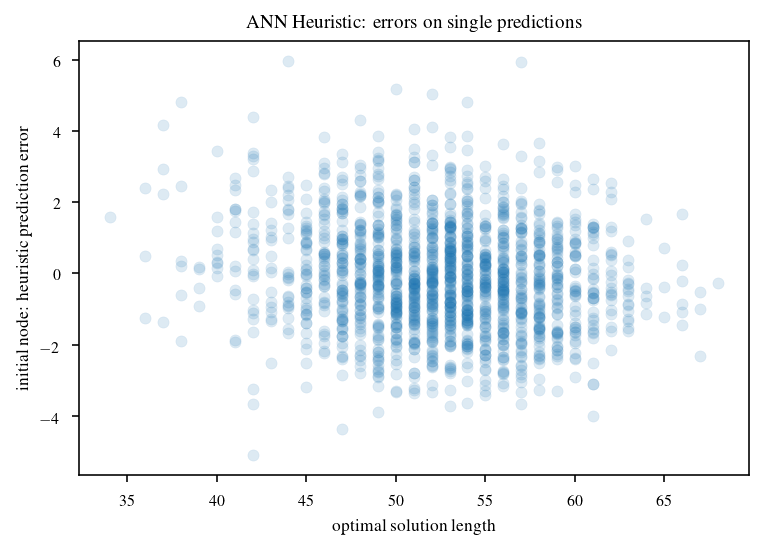

In [14]:
plt.scatter(ann_results_complete["OPTIMAL_SOLUTION_COST"], ann_results_complete["INITIAL_HEURISTIC_PREDICTION_ERROR"], alpha=0.15)
plt.title("ANN Heuristic: errors on single predictions")
plt.xlabel("optimal solution length")
plt.ylabel("initial node: heuristic prediction error");

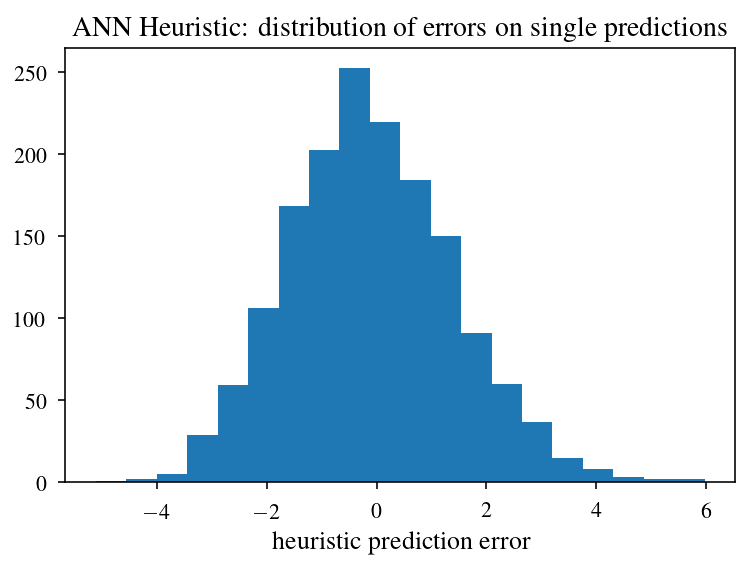

In [15]:
f = plt.figure()

plt.hist(ann_results_complete['INITIAL_HEURISTIC_PREDICTION_ERROR'], bins=20)
plt.title("ANN Heuristic: distribution of errors on single predictions", fontsize=14)
plt.xlabel("heuristic prediction error", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

f.savefig("expr_ann-heur-pred-error-distr.pdf", bbox_inches='tight')

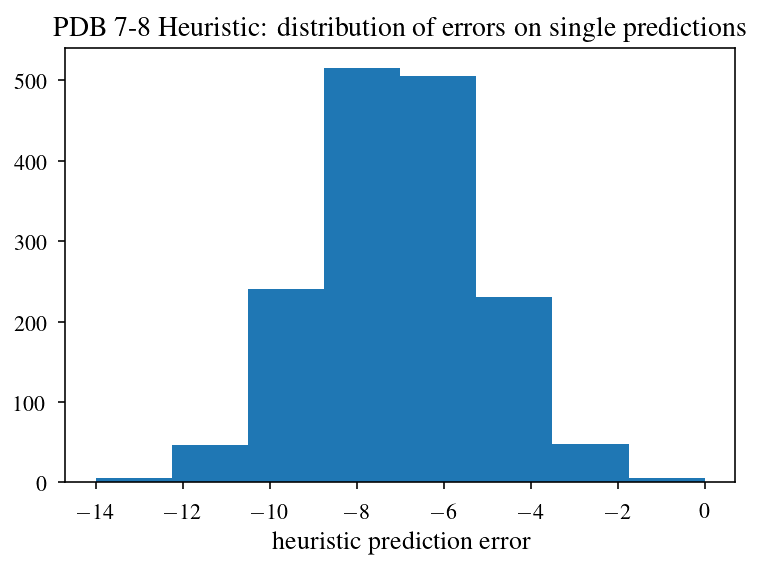

In [16]:
f = plt.figure()

plt.hist(pdb_results_complete['INITIAL_HEURISTIC_PREDICTION_ERROR'], bins=8)
plt.title("PDB 7-8 Heuristic: distribution of errors on single predictions", fontsize=14)
plt.xlabel("heuristic prediction error", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

f.savefig("expr_pd87-heur-pred-error-distr.pdf", bbox_inches='tight')

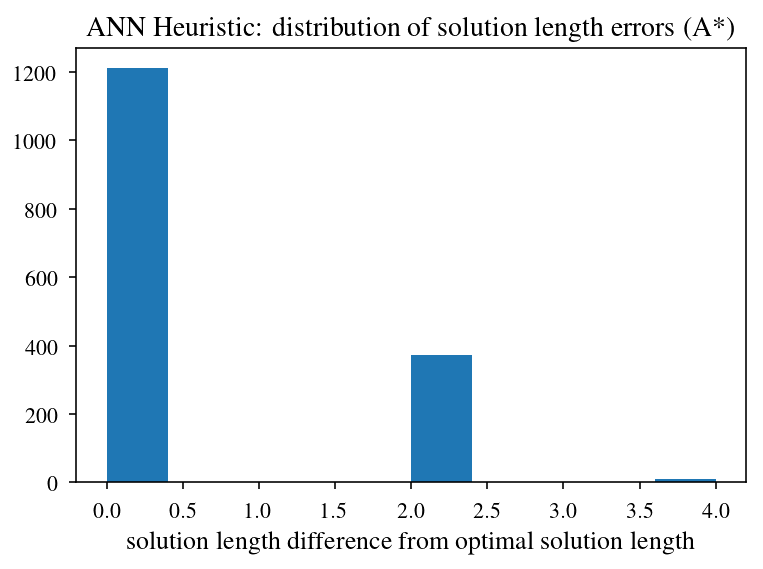

In [17]:
f = plt.figure()

plt.hist(ann_results_complete['SOLUTION_COST_ERROR'], bins=10)
plt.title("ANN Heuristic: distribution of solution length errors (A*)", fontsize=14)
plt.xlabel("solution length difference from optimal solution length", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

f.savefig("expr_astar-ann-heur-optimal-error.pdf", bbox_inches='tight')

This is better represented by a table:

In [18]:
solution_length_errors_distribution = pd.DataFrame(ann_results_complete['SOLUTION_COST_ERROR'].value_counts()).reset_index()
solution_length_errors_distribution.columns = ['SOLUTION COST ERROR', 'BOARDS COUNT']

solution_length_errors_distribution

,SOLUTION COST ERROR,BOARDS COUNT
0,0,1211
1,2,373
2,4,11


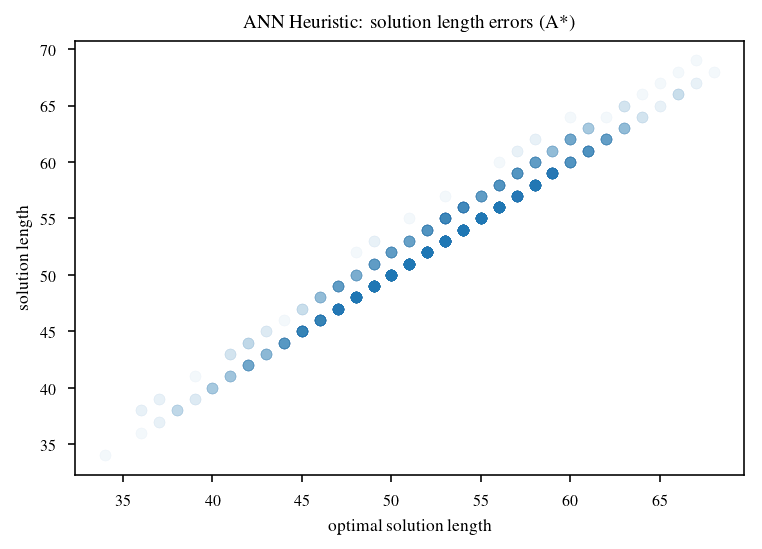

In [19]:
plt.scatter(ann_results_complete["OPTIMAL_SOLUTION_COST"], ann_results_complete["SOLUTION_COST"], alpha=0.05)
plt.title("ANN Heuristic: solution length errors (A*)")
plt.xlabel("optimal solution length")
plt.ylabel("solution length");

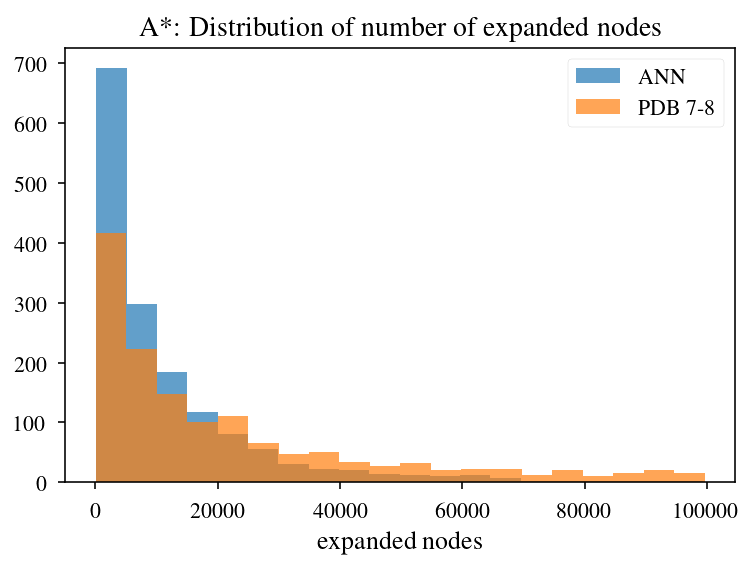

In [20]:
f = plt.figure()

plt.hist(ann_results_complete[ann_results_complete['EXPANDED_NODES'] < 100000]['EXPANDED_NODES'], bins=20, alpha=0.7, label="ANN");
plt.hist(pdb_results_complete[pdb_results_complete['EXPANDED_NODES'] < 100000]['EXPANDED_NODES'], bins=20, alpha=0.7, label="PDB 7-8");
plt.title("A*: Distribution of number of expanded nodes", fontsize=14)
plt.xlabel("expanded nodes", fontsize=13)
plt.legend(fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

f.savefig("expr_expand-nodes-distr.pdf", bbox_inches='tight')